In [141]:
# LAB | Imbalanced data
# We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

# Instructions
# 1. Load the dataset and explore the variables.
# 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
# 3. Extract the target variable.
# 4. Extract the independent variables and scale them.
# 5. Build the logistic regression model.
# 6. Evaluate the model.
# 7. Even a simple model will give us more than 70% accuracy. Why?
# 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
# Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [143]:
#Load the dataset and explore the variables.
c_churn = pd.read_csv('customer_churn.csv')
c_churn.columns= c_churn.columns.str.lower().str.replace(' ', '_')
c_churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [144]:
c_churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [145]:
c_churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [146]:
# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges. 
# Drop the label columns we won't need
c_churn = c_churn.drop(labels=['customerid', 'gender', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'totalcharges'], axis=1)
c_churn

,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [147]:
c_churn.replace({'No': 0, 'Yes': 1}, inplace=True)
c_churn

,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


In [148]:
# Extract the target variable.
# Extract the independent variables and scale them.

# X/y split
X = c_churn.drop('churn',axis = 1)
y = c_churn['churn']

In [149]:
# scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [150]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,seniorcitizen,tenure,monthlycharges
0,-0.435476,-0.340191,-0.514314
1,2.296336,0.883210,0.017840
2,-0.435476,-1.196572,-0.819594
3,-0.435476,1.168670,-1.483535
4,-0.435476,-0.829552,0.658427


In [151]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: churn, dtype: int64

In [152]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [153]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [154]:
# Build the logistic regression model.

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [155]:
# Evaluate the model
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

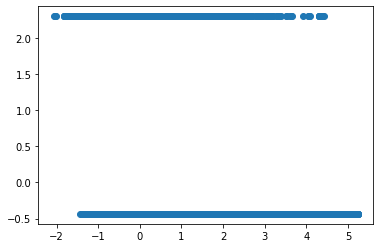

In [156]:
plt.scatter(logits,X_train_scaled['seniorcitizen'])

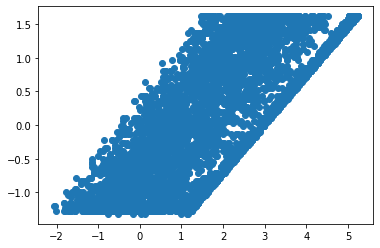

In [157]:
plt.scatter(logits,X_train_scaled['tenure'])

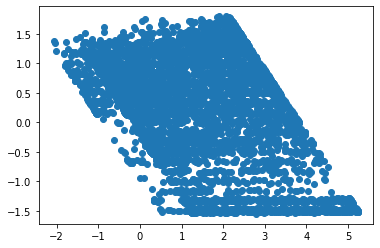

In [158]:
plt.scatter(logits,X_train_scaled['monthlycharges'])

<AxesSubplot:>

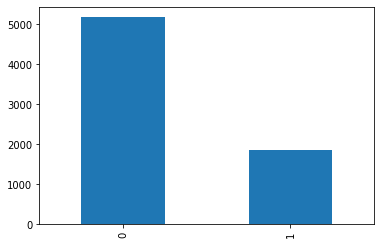

In [159]:
# Imbalance and metrics

count_classes = c_churn['churn'].value_counts()
count_classes.plot(kind = 'bar')

In [160]:
c_churn['churn'].value_counts()

5174/(5174+1869)

0.7346301292063041

In [161]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [162]:
# Why?!
# Because we have imbalanced data in which the observed frequencies are very different across the different possible values of a categorical variable. 
# Basically, there are many observations of some type and very few of another type.

In [163]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

In [165]:
# Oversampling / Undersampling

train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,seniorcitizen,tenure,monthlycharges,churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
2,-0.435476,-1.196572,-0.819594,1
3,-0.435476,1.168670,-1.483535,0
4,-0.435476,-0.829552,0.658427,1


In [166]:
# OVERSAMPLING

no_churn = train[train['churn']==0]
yes_churn = train[train['churn']==1]

In [167]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [168]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [169]:
# both sets are now of a reasonable size
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [170]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,seniorcitizen,tenure,monthlycharges,churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
3,-0.435476,1.168670,-1.483535,0
5,-0.435476,1.046330,0.503285,0
6,-0.435476,-0.258631,0.701800,0


In [171]:
y_train_over = train_oversampled['churn'].copy()
X_train_over = train_oversampled.drop('churn',axis = 1).copy()

In [172]:
# again Logistic Regression - not much better!
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [173]:
confusion_matrix(y_test,pred)

array([[937, 361],
       [131, 332]], dtype=int64)

In [174]:
# UNDERSAMPLING

no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [175]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1406, 4)

(1406, 4)

In [176]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled])
train_undersampled.head()

,seniorcitizen,tenure,monthlycharges,churn
2,-0.435476,-1.196572,-0.819594,1
4,-0.435476,-0.829552,0.658427,1
12,-0.435476,-1.115012,0.630068,1
13,-0.435476,-1.237352,0.199673,1
15,-0.435476,-1.155792,0.698464,1


In [177]:
y_train_under = train_undersampled['churn'].copy()
X_train_under = train_undersampled.drop('churn',axis = 1).copy()

In [178]:
# no big difference
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.47701149425287354
recall:  0.7170626349892009
f1:  0.5729076790336497


In [179]:
confusion_matrix(y_test,pred)

array([[934, 364],
       [131, 332]], dtype=int64)

In [180]:
# SMOTE - Synthetic Minority Oversampling TEchnique

sm = SMOTE(random_state=100,k_neighbors=50)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [181]:
X_train_SMOTE.shape

(7752, 3)

In [184]:
# a slightly improvement

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.48175182481751827
recall:  0.712742980561555
f1:  0.5749128919860627


In [183]:
confusion_matrix(y_test,pred)

array([[943, 355],
       [133, 330]], dtype=int64)

In [185]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)